In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Data source- 
yearly_hour_df=pd.read_excel('Data/niti/2021-2022-Yearly Demand Profile.xlsx',skipfooter=4)
datetime_str = yearly_hour_df['Year'].astype(str) + ' ' + yearly_hour_df['Date']
yearly_hour_df['dt'] = pd.to_datetime(datetime_str, format='%Y %d-%b %I%p')
sel_rows=['dt','Hourly Demand Met (in MW)']
yearly_hour_df=yearly_hour_df[sel_rows]
# yearly_hour_df.set_index('dt',inplace=True)

In [43]:
yearly_hour_df['dt'].min(),yearly_hour_df['dt'].max()

(Timestamp('2021-01-01 01:00:00'), Timestamp('2022-12-31 23:00:00'))

In [85]:
yearly_hour_df=pd.read_excel('Data/niti/2021-2022-Yearly Demand Profile.xlsx',skipfooter=4)
yearly_hour_df.head()

,Year,Date,Hourly Demand Met (in MW)
0,2021,01-Jan 1am,122343.44
1,2021,01-Jan 2am,119712.46
2,2021,01-Jan 3am,119364.83
3,2021,01-Jan 4am,121469.48
4,2021,01-Jan 5am,129299.77


In [52]:
hourly_mean=pd.DataFrame()
hourly_mean['mean']=yearly_hour_df.groupby(yearly_hour_df['dt'].dt.hour)['Hourly Demand Met (in MW)'].mean()



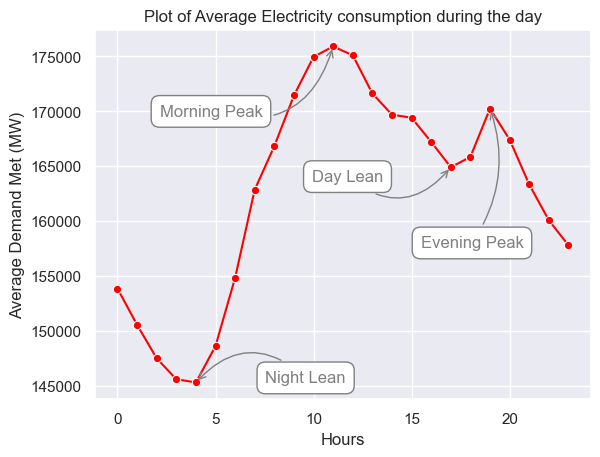

In [86]:
sns.set(style="darkgrid")
#markers_color = ['green','green','green','green','red','red','green','green']


sns.lineplot(data=hourly_mean,x=hourly_mean.index,y='mean',marker='o',color='red')

plt.xlabel("Hours")
plt.ylabel("Average Demand Met (MW)")
plt.title("Plot of Average Electricity consumption during the day")


plt.annotate('Morning Peak',
             color='grey',
             xy=(hourly_mean.index[11],hourly_mean['mean'][11]), 
             xytext=(-125, -50),  # Position of the text box
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', lw=1),  # Box style
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='grey')  # Arrow properties
            )
plt.annotate('Night Lean',
             color='grey',
             xy=(hourly_mean.index[4],hourly_mean['mean'][4]), 
             xytext=(50, 0),  # Position of the text box
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', lw=1),  # Box style
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='grey')  # Arrow properties
            )
plt.annotate('Day Lean',
             color='grey',
             xy=(hourly_mean.index[17],hourly_mean['mean'][17]), 
             xytext=(-100, -10),  # Position of the text box
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', lw=1),  # Box style
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='grey')  # Arrow properties
            )
plt.annotate('Evening Peak',
             color='grey',
             xy=(hourly_mean.index[19],hourly_mean['mean'][19]), 
             xytext=(-50, -100),  # Position of the text box
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='grey', lw=1),  # Box style
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.25', color='grey')  # Arrow properties
            )
plt.savefig('Data/images/Load Curve.png',dpi=400,bbox_inches='tight')
plt.show()

In [30]:
yearly_hour_df

,dt,Hourly Demand Met (in MW)
0,2021-01-01 01:00:00,122343.44
1,2021-01-01 02:00:00,119712.46
2,2021-01-01 03:00:00,119364.83
3,2021-01-01 04:00:00,121469.48
4,2021-01-01 05:00:00,129299.77
...,...,...
17514,2022-12-31 19:00:00,178555.90
17515,2022-12-31 20:00:00,169023.94
17516,2022-12-31 21:00:00,159457.30
17517,2022-12-31 22:00:00,150281.08
